

**What is the objective of this exploratory data analysis**
The main aim of this exploratory data analysis is to predict the overal productivity of employees working in teams in a garment fabricating factory.

this dataset was picked from UCI bases on the research article "mining the productivity data for garment industry" by Abdullah AL Iman et al.

Bellow is how i import python libraries, pick the dataset and put it into a pandas dataframe for preprocessing.


In [2]:
#importing librarues and fetching the dataset

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


pdt = pd.read_csv('https://raw.githubusercontent.com/hadijaathman/Machine-learning-MCSC/main/garments_worker_productivity.csv')



**What data is stored in the dataset?**

I explore the type of data stored in the dataframe using functions like .head(), .tail(), info(), describe(), shape


In [ ]:
#displaying the first 10 records in the dataframe
pdt.head(10)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
5,1/1/2015,Quarter1,sweing,Thursday,7,0.80,25.90,984.0,6720,38,0.0,0,0,56.0,0.800125
6,1/1/2015,Quarter1,finishing,Thursday,2,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.755167
7,1/1/2015,Quarter1,sweing,Thursday,3,0.75,28.08,795.0,6900,45,0.0,0,0,57.5,0.753683
8,1/1/2015,Quarter1,sweing,Thursday,2,0.75,19.87,733.0,6000,34,0.0,0,0,55.0,0.753098
9,1/1/2015,Quarter1,sweing,Thursday,1,0.75,28.08,681.0,6900,45,0.0,0,0,57.5,0.750428


In [ ]:
#displaying the last 10 records in the dataset
pdt.tail(10)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
1187,3/11/2015,Quarter2,sweing,Wednesday,4,0.75,26.82,1054.0,7080,45,0.0,0,0,59.0,0.750051
1188,3/11/2015,Quarter2,sweing,Wednesday,5,0.70,26.82,992.0,6960,30,0.0,0,1,58.0,0.700557
1189,3/11/2015,Quarter2,sweing,Wednesday,8,0.70,30.48,914.0,6840,30,0.0,0,1,57.0,0.700505
1190,3/11/2015,Quarter2,sweing,Wednesday,6,0.70,23.41,1128.0,4560,40,0.0,0,1,38.0,0.700246
1191,3/11/2015,Quarter2,sweing,Wednesday,7,0.65,30.48,935.0,6840,26,0.0,0,1,57.0,0.650596
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889
1196,3/11/2015,Quarter2,finishing,Wednesday,6,0.70,2.90,NaN,720,0,0.0,0,0,6.0,0.394722


In [ ]:
#Displaying the columns and their data types
pdt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [ ]:
pdt.nunique()

,0
date,59
quarter,5
department,3
day,6
team,12
targeted_productivity,9
smv,70
wip,548
over_time,143
incentive,48


In [ ]:
# filtering out unique values of each column
pdt['quarter'].unique()


array(['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4', 'Quarter5'],
      dtype=object)

In [ ]:
#checking the number of rows and columns in the dataframe
pdt.shape

(1197, 15)

From the above representation. the dataframe consists of the following
- i table that has 1197 rows and 15 columns
- the column types are both string and floating point

the following are the columns
1. date - this is the date when the data was collected. Data type Object
2. Quarter - A portion of the month. A month was divided into five quarters. Data type Object
3. department - Associated department with the instance i.e finishing and sewing. Data type Object
4. day - Day of the Week i.e monday, tuesday, wednesday…Data type Object
5. team - Associated team number with the instance. Data type Integer
6. targeted_productivity - Targeted productivity set by the Authority for each team for each day represented between a range of 0 to 1.  Data type Float
7. smv - Standard Minute Value, it is the allocated time for a task. Data type Float
8. wip - Work in progress. Includes the number of unfinished items for products . Data type Float
9.  over_time - extra time worked in terms of hours .Data type Float
10.   incentive   - how much an employee will be compensated for assigned work. Data type Float
11.  idle_time  - the time in which the employee was not doing anything work related for many reasons .Data type Float
12.  idle_men  - Number of workers who were idle due to production interruption. Data type Integer
13.  no_of_style_change - Number of changes in the style of a particular product  represented in 0, 1 and 2. Data type Integer
14.  no_of_workers -  number of workers assigned a given task.Data type Float
15.  actual_productivity - actual productivity of the employees on a given day for a given team represented between a range of 0 to 1. Data type Float



**Are there any missing values in the dataframe**



is the data well represented for processing

here i will check for any duplicate values, miss representations and correct where neccessary



In [ ]:
#checking for any missing values in the dataset
pdt.isnull().sum()

,0
date,0
quarter,0
department,0
day,0
team,0
targeted_productivity,0
smv,0
wip,506
over_time,0
incentive,0


In [ ]:
#percentage of null values
(pdt.isnull().sum()/(len(pdt)))*100

,0
date,0.000000
quarter,0.000000
department,0.000000
day,0.000000
team,0.000000
targeted_productivity,0.000000
smv,0.000000
wip,42.272348
over_time,0.000000
incentive,0.000000


- the representation shows that the dataframe has 506 missing values under work in progress,
- that contributes to 42.273% of the work in progress data

In [ ]:
#duplicate values
pdt.duplicated().sum()

0

**What is the sammary statistical analysis of the data**

In [ ]:
pdt.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [3]:
# separating columns that are continous from the categorical columns for easy analysis
category_columns=pdt.select_dtypes(include=['object']).columns
numerical_columns = pdt.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(category_columns)
print("Numerical Variables:")
print(numerical_columns)

Categorical Variables:
Index(['date', 'quarter', 'department', 'day'], dtype='object')
Numerical Variables:
['team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers', 'actual_productivity']


In [ ]:
# checking for unique values in the dataset
for col in category_columns:
  print(col)
  print(pdt[col].unique())


  print('\n')

date
['1/1/2015' '1/3/2015' '1/4/2015' '1/5/2015' '1/6/2015' '1/7/2015'
 '1/8/2015' '1/10/2015' '1/11/2015' '1/12/2015' '1/13/2015' '1/14/2015'
 '1/15/2015' '1/17/2015' '1/18/2015' '1/19/2015' '1/20/2015' '1/21/2015'
 '1/22/2015' '1/24/2015' '1/25/2015' '1/26/2015' '1/27/2015' '1/28/2015'
 '1/29/2015' '1/31/2015' '2/1/2015' '2/2/2015' '2/3/2015' '2/4/2015'
 '2/5/2015' '2/7/2015' '2/8/2015' '2/9/2015' '2/10/2015' '2/11/2015'
 '2/12/2015' '2/14/2015' '2/15/2015' '2/16/2015' '2/17/2015' '2/18/2015'
 '2/19/2015' '2/22/2015' '2/23/2015' '2/24/2015' '2/25/2015' '2/26/2015'
 '2/28/2015' '3/1/2015' '3/2/2015' '3/3/2015' '3/4/2015' '3/5/2015'
 '3/7/2015' '3/8/2015' '3/9/2015' '3/10/2015' '3/11/2015']


quarter
['Quarter1' 'Quarter2' 'Quarter3' 'Quarter4' 'Quarter5']


department
['sweing' 'finishing ' 'finishing']


day
['Thursday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']




From the above representation, quarter is divided in to 4 but theres 5 displayed
under department, sewing is misspelt and finishing has an extra whitespace which makes it look like there are two unique values.

**Data Wrangling to clean the data and prepare it for processing**

In [4]:
# first before making changes i shall create a copy of the data frame so that i have the original for references
pdt_clean = pdt.copy()

# replacing miss-spelt strings and removing white spaces in strings under department column
pdt_clean['department'] = pdt_clean['department'].str.replace('finishing ', 'finishing')
pdt_clean['department'] = pdt_clean['department'].str.replace('sweing', 'sewing')


#checking the output
pdt_clean['department'].unique()

array(['sewing', 'finishing'], dtype=object)

In [ ]:
pdt_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [ ]:
#investigating quarter column to see where the quater5 is coming from
pdt_clean[pdt_clean['quarter'] == 'Quarter5']

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
498,1/29/2015,Quarter5,sewing,Thursday,2,0.80,22.52,1416.0,6840,113,0.0,0,0,57.0,1.000230
499,1/29/2015,Quarter5,finishing,Thursday,4,0.80,4.30,NaN,1200,0,0.0,0,0,10.0,0.989000
500,1/29/2015,Quarter5,sewing,Thursday,3,0.80,22.52,1287.0,6840,100,0.0,0,0,57.0,0.950186
501,1/29/2015,Quarter5,sewing,Thursday,4,0.80,22.52,1444.0,6900,88,0.0,0,0,57.5,0.900800
502,1/29/2015,Quarter5,sewing,Thursday,10,0.80,22.52,1088.0,6720,88,0.0,0,0,56.0,0.900130
503,1/29/2015,Quarter5,finishing,Thursday,6,0.50,2.90,NaN,1200,0,0.0,0,0,10.0,0.899000
504,1/29/2015,Quarter5,finishing,Thursday,8,0.65,4.15,NaN,960,0,0.0,0,0,8.0,0.877552
505,1/29/2015,Quarter5,finishing,Thursday,11,0.60,2.90,NaN,960,0,0.0,0,0,8.0,0.864583
506,1/29/2015,Quarter5,finishing,Thursday,10,0.80,3.94,NaN,1200,0,0.0,0,0,10.0,0.856950
507,1/29/2015,Quarter5,finishing,Thursday,1,0.75,3.94,NaN,1200,0,0.0,0,0,10.0,0.853667


From the above quarter investigation Quarter5 label only apears in the month january for which the dates are above 28. To fix this and have only 4 quarters, i shall consider all Quarter5 to be quarter 4 since the dates are closer to the ones tha fall on Quarter4.

In [9]:
#replacing quarter5 with quarter4
pdt_clean['quarter'] = pdt_clean.quarter.str.replace('Quarter5', 'Quarter4')


#checking that there are now 4 quarters only
pdt_clean.quarter.unique()

array(['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4'], dtype=object)

In [13]:
#converting date data type to datetime rather than string
pdt_clean['date'] = pd.to_datetime(pdt_clean['date'])

#checking the new output
pdt_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1197 non-null   datetime64[ns]
 1   quarter                1197 non-null   object        
 2   department             1197 non-null   object        
 3   day                    1197 non-null   object        
 4   team                   1197 non-null   int64         
 5   targeted_productivity  1197 non-null   float64       
 6   smv                    1197 non-null   float64       
 7   wip                    691 non-null    float64       
 8   over_time              1197 non-null   int64         
 9   incentive              1197 non-null   int64         
 10  idle_time              1197 non-null   float64       
 11  idle_men               1197 non-null   int64         
 12  no_of_style_change     1197 non-null   int64         
 13  no_

In [ ]:
#checking for missing values
pdt_clean.isnull().sum()

,0
date,0
quarter,0
department,0
day,0
team,0
targeted_productivity,0
smv,0
wip,506
over_time,0
incentive,0


In [ ]:
#replacing missing values with the mean value
pdt_clean['wip'].fillna(pdt_clean['wip'].mean(), inplace=True)

#checking the output
pdt_clean['wip'].isnull().sum()

0

**Exploratory data analysis on the dataframe is as shown below**

first we specify which columns are continuous and which ones are categorical

In [ ]:
# specifying which values are continuous/ numerical and which ones are categorical
category_columns=pdt_clean.select_dtypes(include=['object']).columns.tolist()
numerical_columns = pdt_clean.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(category_columns)
print("Numerical Variables:")
print(numerical_columns)

Categorical Variables:
['quarter', 'department', 'day']
Numerical Variables:
['team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers', 'actual_productivity']


team
Skew : 0.01


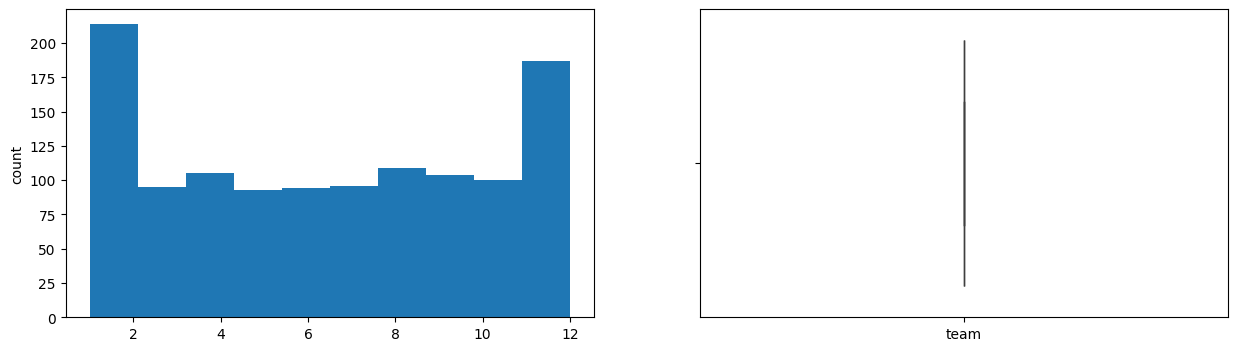

targeted_productivity
Skew : -2.14


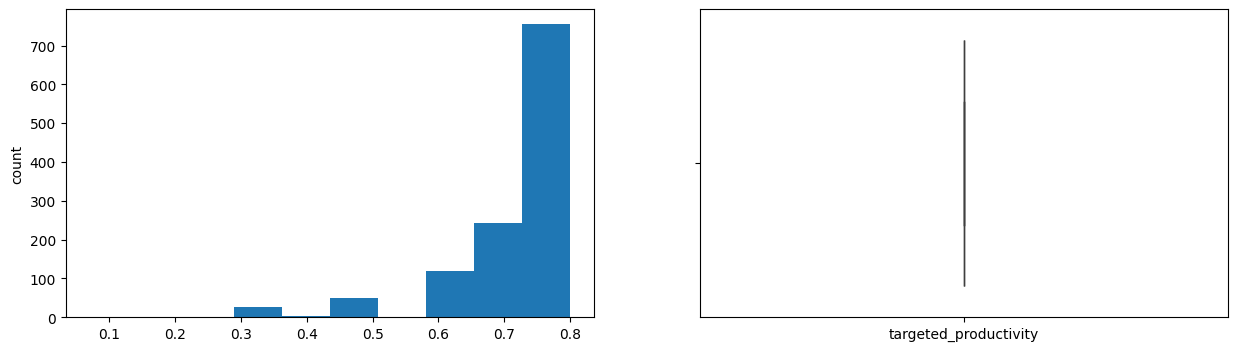

smv
Skew : 0.41


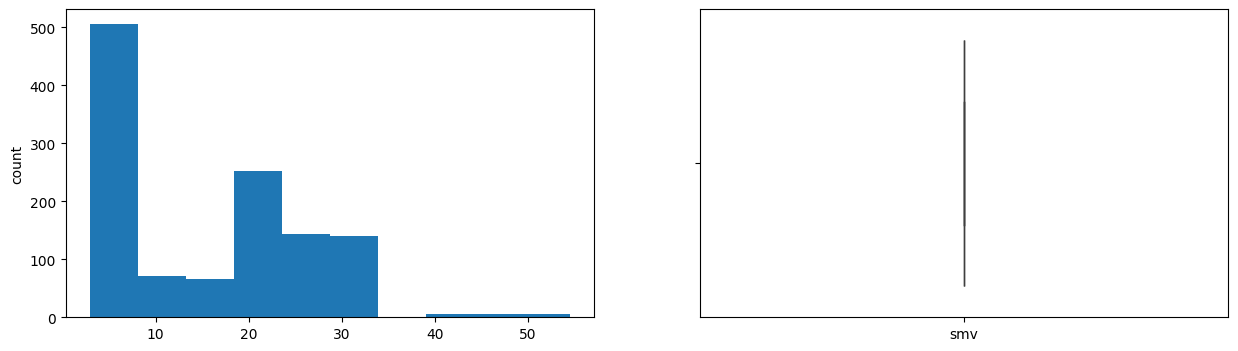

wip
Skew : 9.74


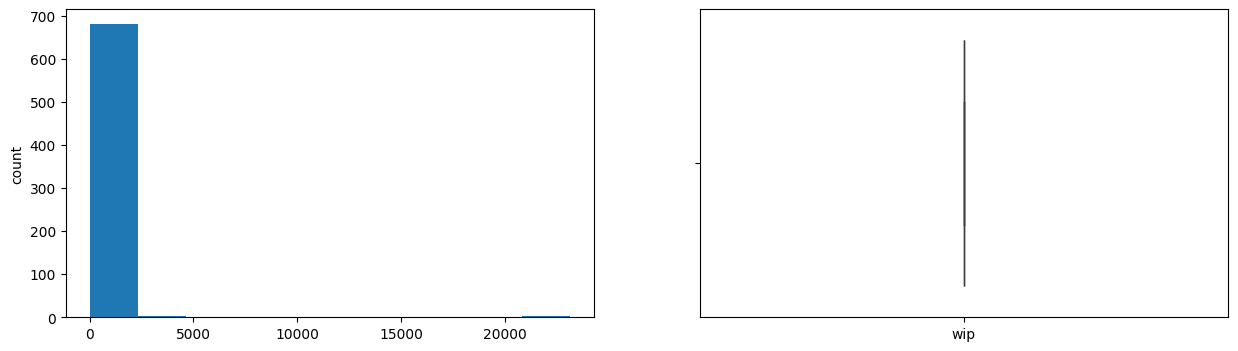

over_time
Skew : 0.67


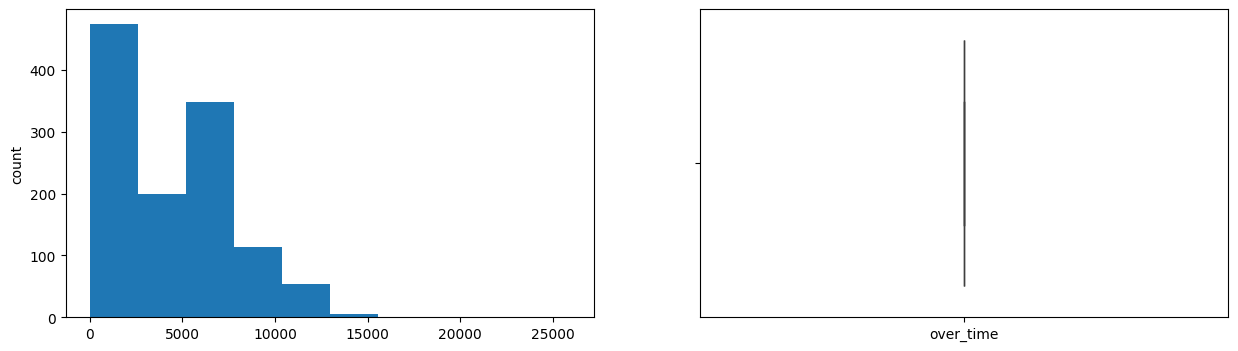

incentive
Skew : 15.79


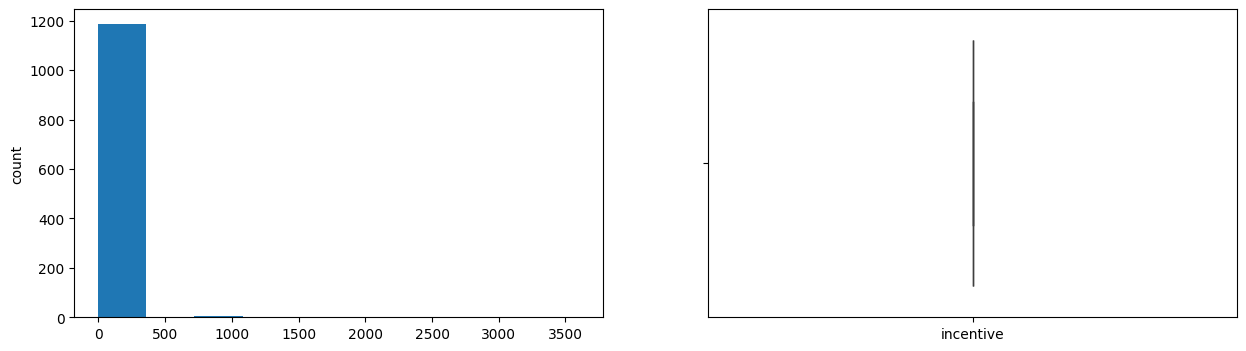

idle_time
Skew : 20.55


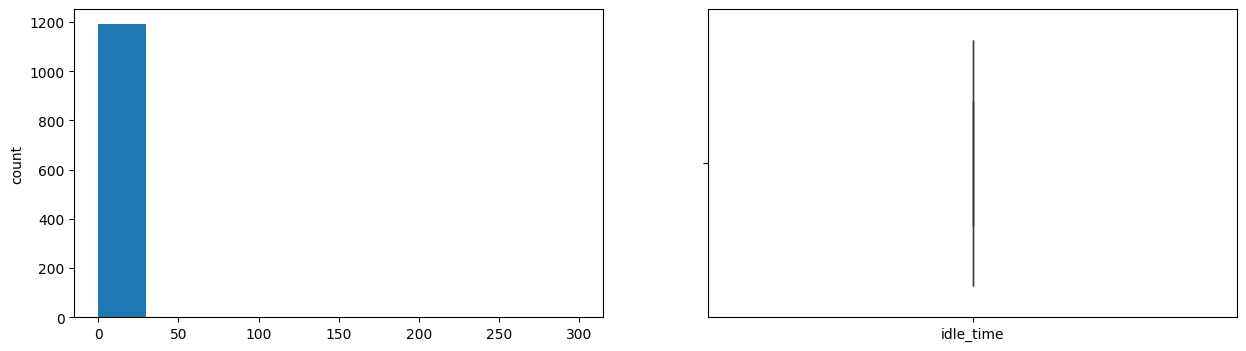

idle_men
Skew : 9.86


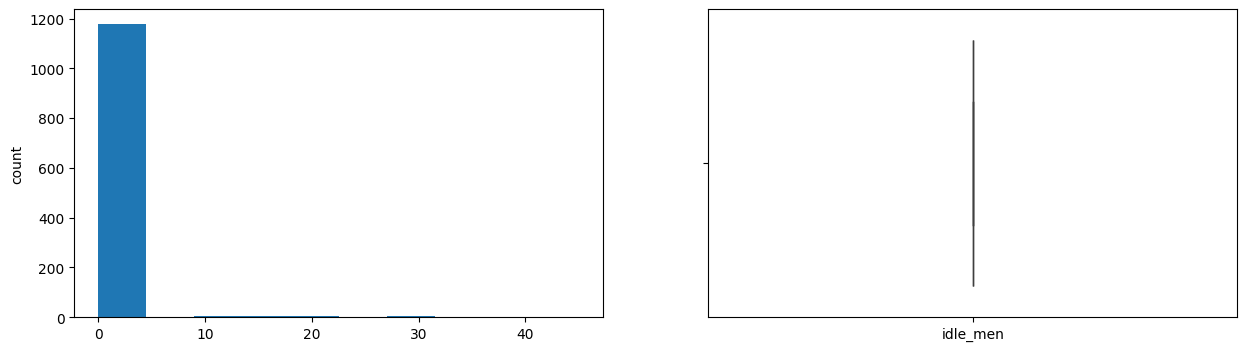

no_of_style_change
Skew : 2.94


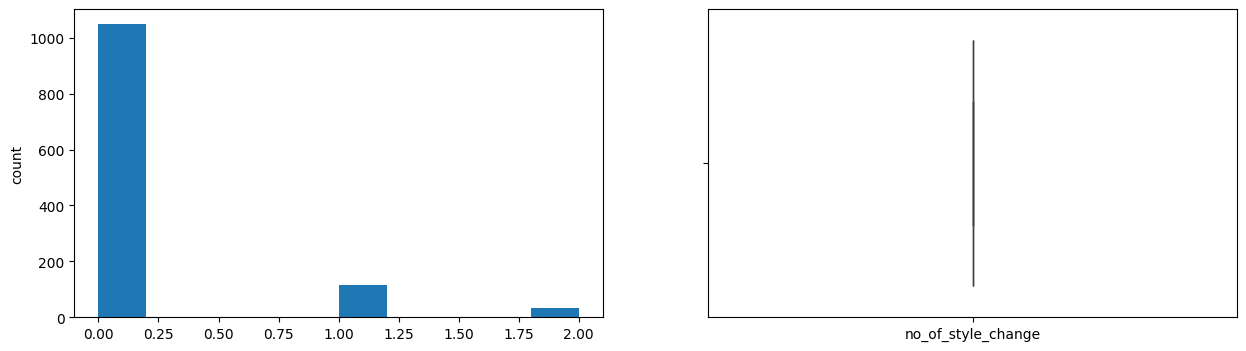

no_of_workers
Skew : -0.11


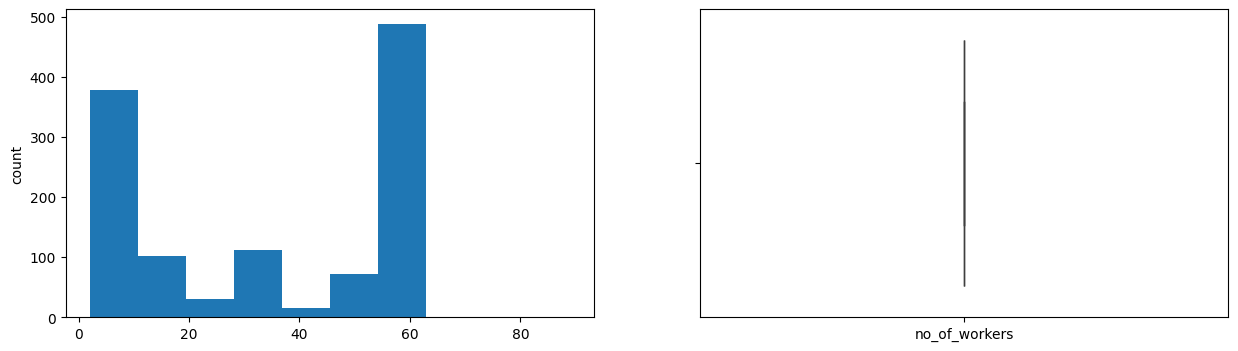

actual_productivity
Skew : -0.81


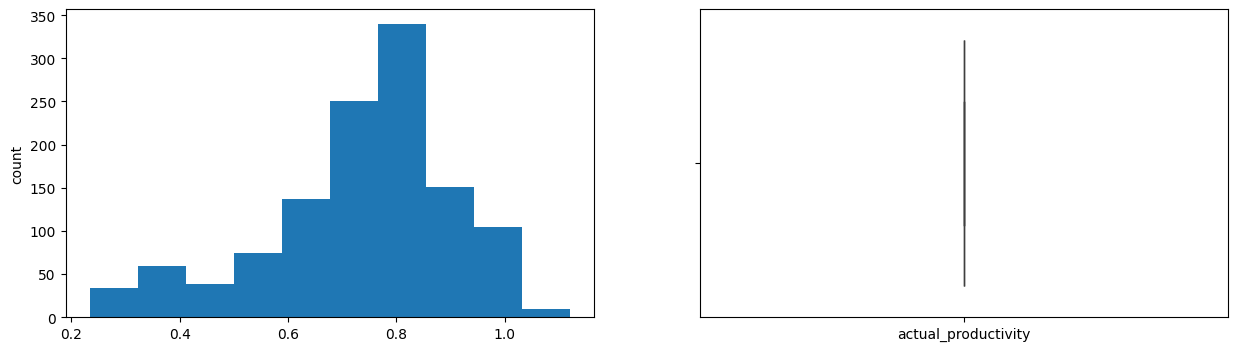

In [ ]:
# count bar graphs of the numerical columns
for col in numerical_columns:
    print(col)
    print('Skew :', round(pdt_clean[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    pdt[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=[col])
    plt.show()


date


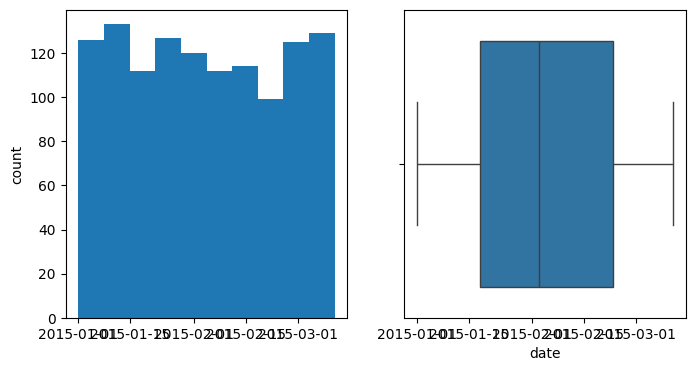

quarter


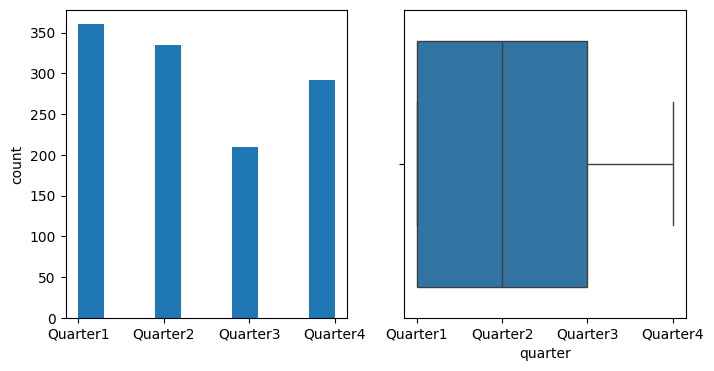

department


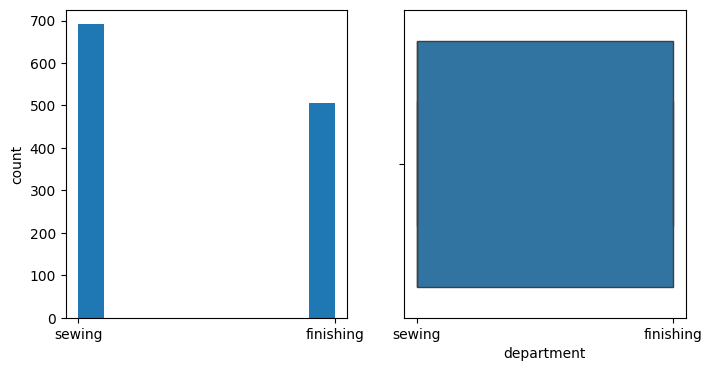

day


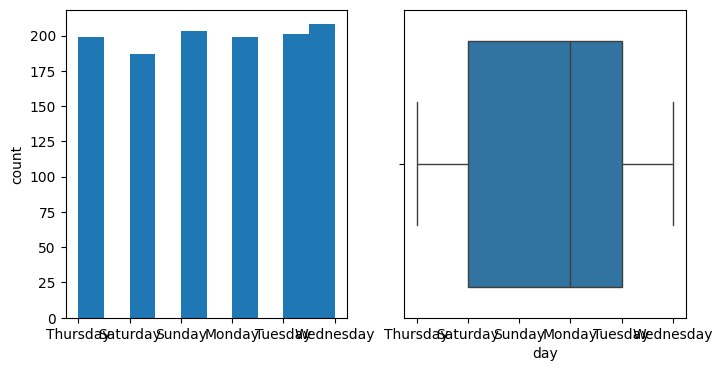

In [ ]:
#bar graph showing
for col in category_columns:
    print(col)

    plt.figure(figsize = (8, 4))
    plt.subplot(1, 2, 1)
    pdt_clean[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=pdt_clean[col])
    plt.show()

From the above observations, it is evident that

-there are more records in the sewing department compared to the finishing department.
- under day column, wednesday has the most records followed by thursday.
- under quarter, quarter 1 had the most records compared to other quarters.
- under teams, 2 and 12 had the most records.

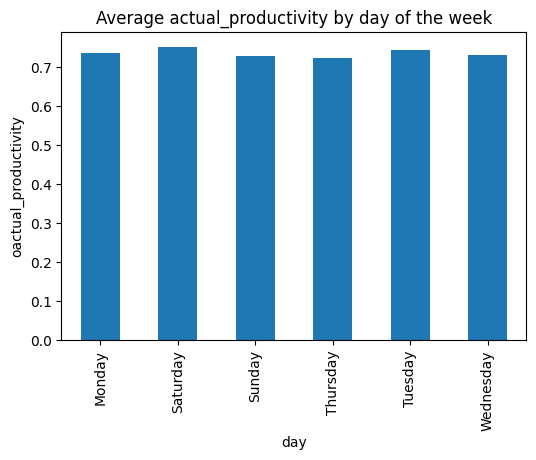

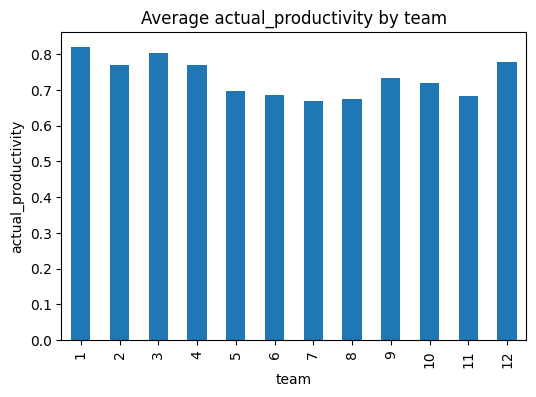

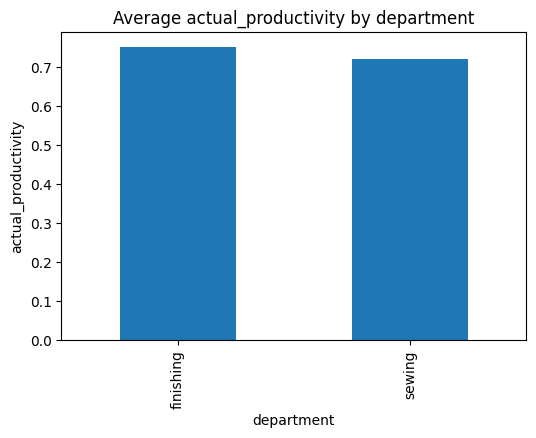

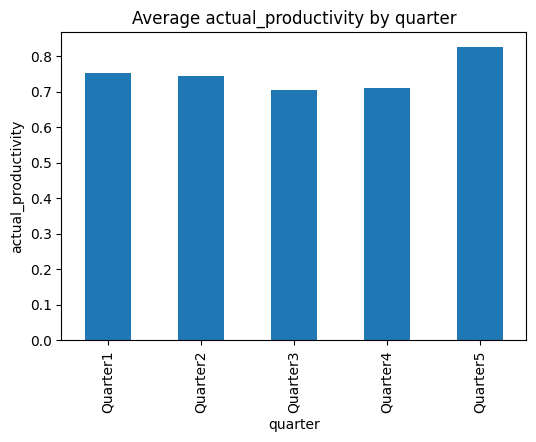

In [ ]:
# Create the bar plot

plt.figure(figsize=(6, 4))
pdt_clean.groupby('day')['actual_productivity'].mean().plot(kind='bar')
plt.xlabel('day')
plt.ylabel('oactual_productivity')
plt.title(f'Average {"actual_productivity"} by {"day of the week"}')
plt.show()
plt.figure(figsize=(6, 4))
pdt_clean.groupby('team')['actual_productivity'].mean().plot(kind='bar')
plt.xlabel('team')
plt.ylabel('actual_productivity')
plt.title(f'Average {"actual_productivity"} by {"team"}')
plt.show()
plt.figure(figsize=(6, 4))
pdt_clean.groupby('department')['actual_productivity'].mean().plot(kind='bar')
plt.xlabel('department')
plt.ylabel('actual_productivity')
plt.title(f'Average {"actual_productivity"} by {"department"}')
plt.show()
plt.figure(figsize=(6, 4))
pdt_clean.groupby('quarter')['actual_productivity'].mean().plot(kind='bar')
plt.xlabel('quarter')
plt.ylabel('actual_productivity')
plt.title(f'Average {"actual_productivity"} by {"quarter"}')
plt.show()



The mean actual productivity was recorded highest in:

- under quarters, quarter 5
- under department, the "finishing" department
- under day, on Saturdays
- under team, team 1


**Time series correlation between actual productivity and incentive**

In [8]:
plt.figure(figsize=(10,6))
# we shall filter out the dates displayed to have a more visibilty of the represntation
#Convert the string '2015-03-08' to a datetime object
date_limit = pd.to_datetime('2015-03-08')

#Filter to include dates before 2015-03-08
pdt_clean_date = pdt_clean[pdt_clean.date <= date_limit]
pdt_clean_date

sns.lineplot(x='date', y='actual_productivity', data=pdt_clean_date, errorbar= None, color='orange' )
sns.lineplot(x='date', y='targeted_productivity', data=pdt_clean_date, errorbar= None, color='blue')

plt.legend(labels=['actual_productivity','targeted_productivity'])
plt.ylabel("productivity")
plt.title("Comparison between Actual and Targeted Productivity over time")
plt.show()


plt.figure(figsize=(10,6))

line1 = sns.lineplot(x='date', y='actual_productivity', data=pdt_clean_date, ci= None, color='orange', legend=False, label = 'actual productivity' )

ax2 = line1.twinx()
line2 = sns.lineplot(x='date', y='incentive', data=pdt_clean_date, ci= None, color='darkgreen',ax=ax2, legend=False, label = 'incentive')

line1.figure.legend()

plt.title("Incentives and actual productivity over time")
plt.show()

TypeError: '<=' not supported between instances of 'str' and 'Timestamp'

<Figure size 1000x600 with 0 Axes>

**Investigating idle time by department**


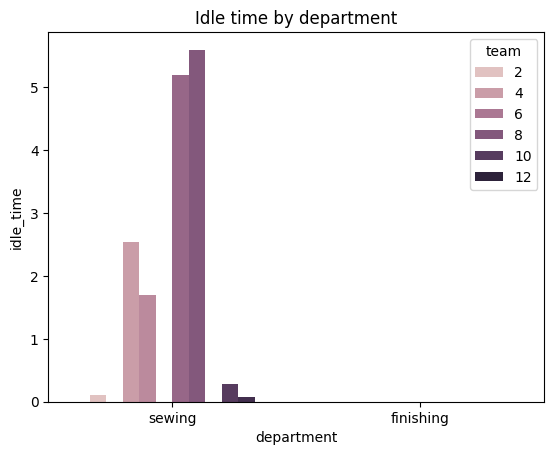

In [ ]:
sns.barplot(x='department', y='idle_time',hue ='team' ,data=pdt_clean, errorbar= None)
plt.title("Idle time by department")
plt.show()

from the bar plot above, investigation show that only the sewing department had recorded idle_time and team 8 had the highest idle_time

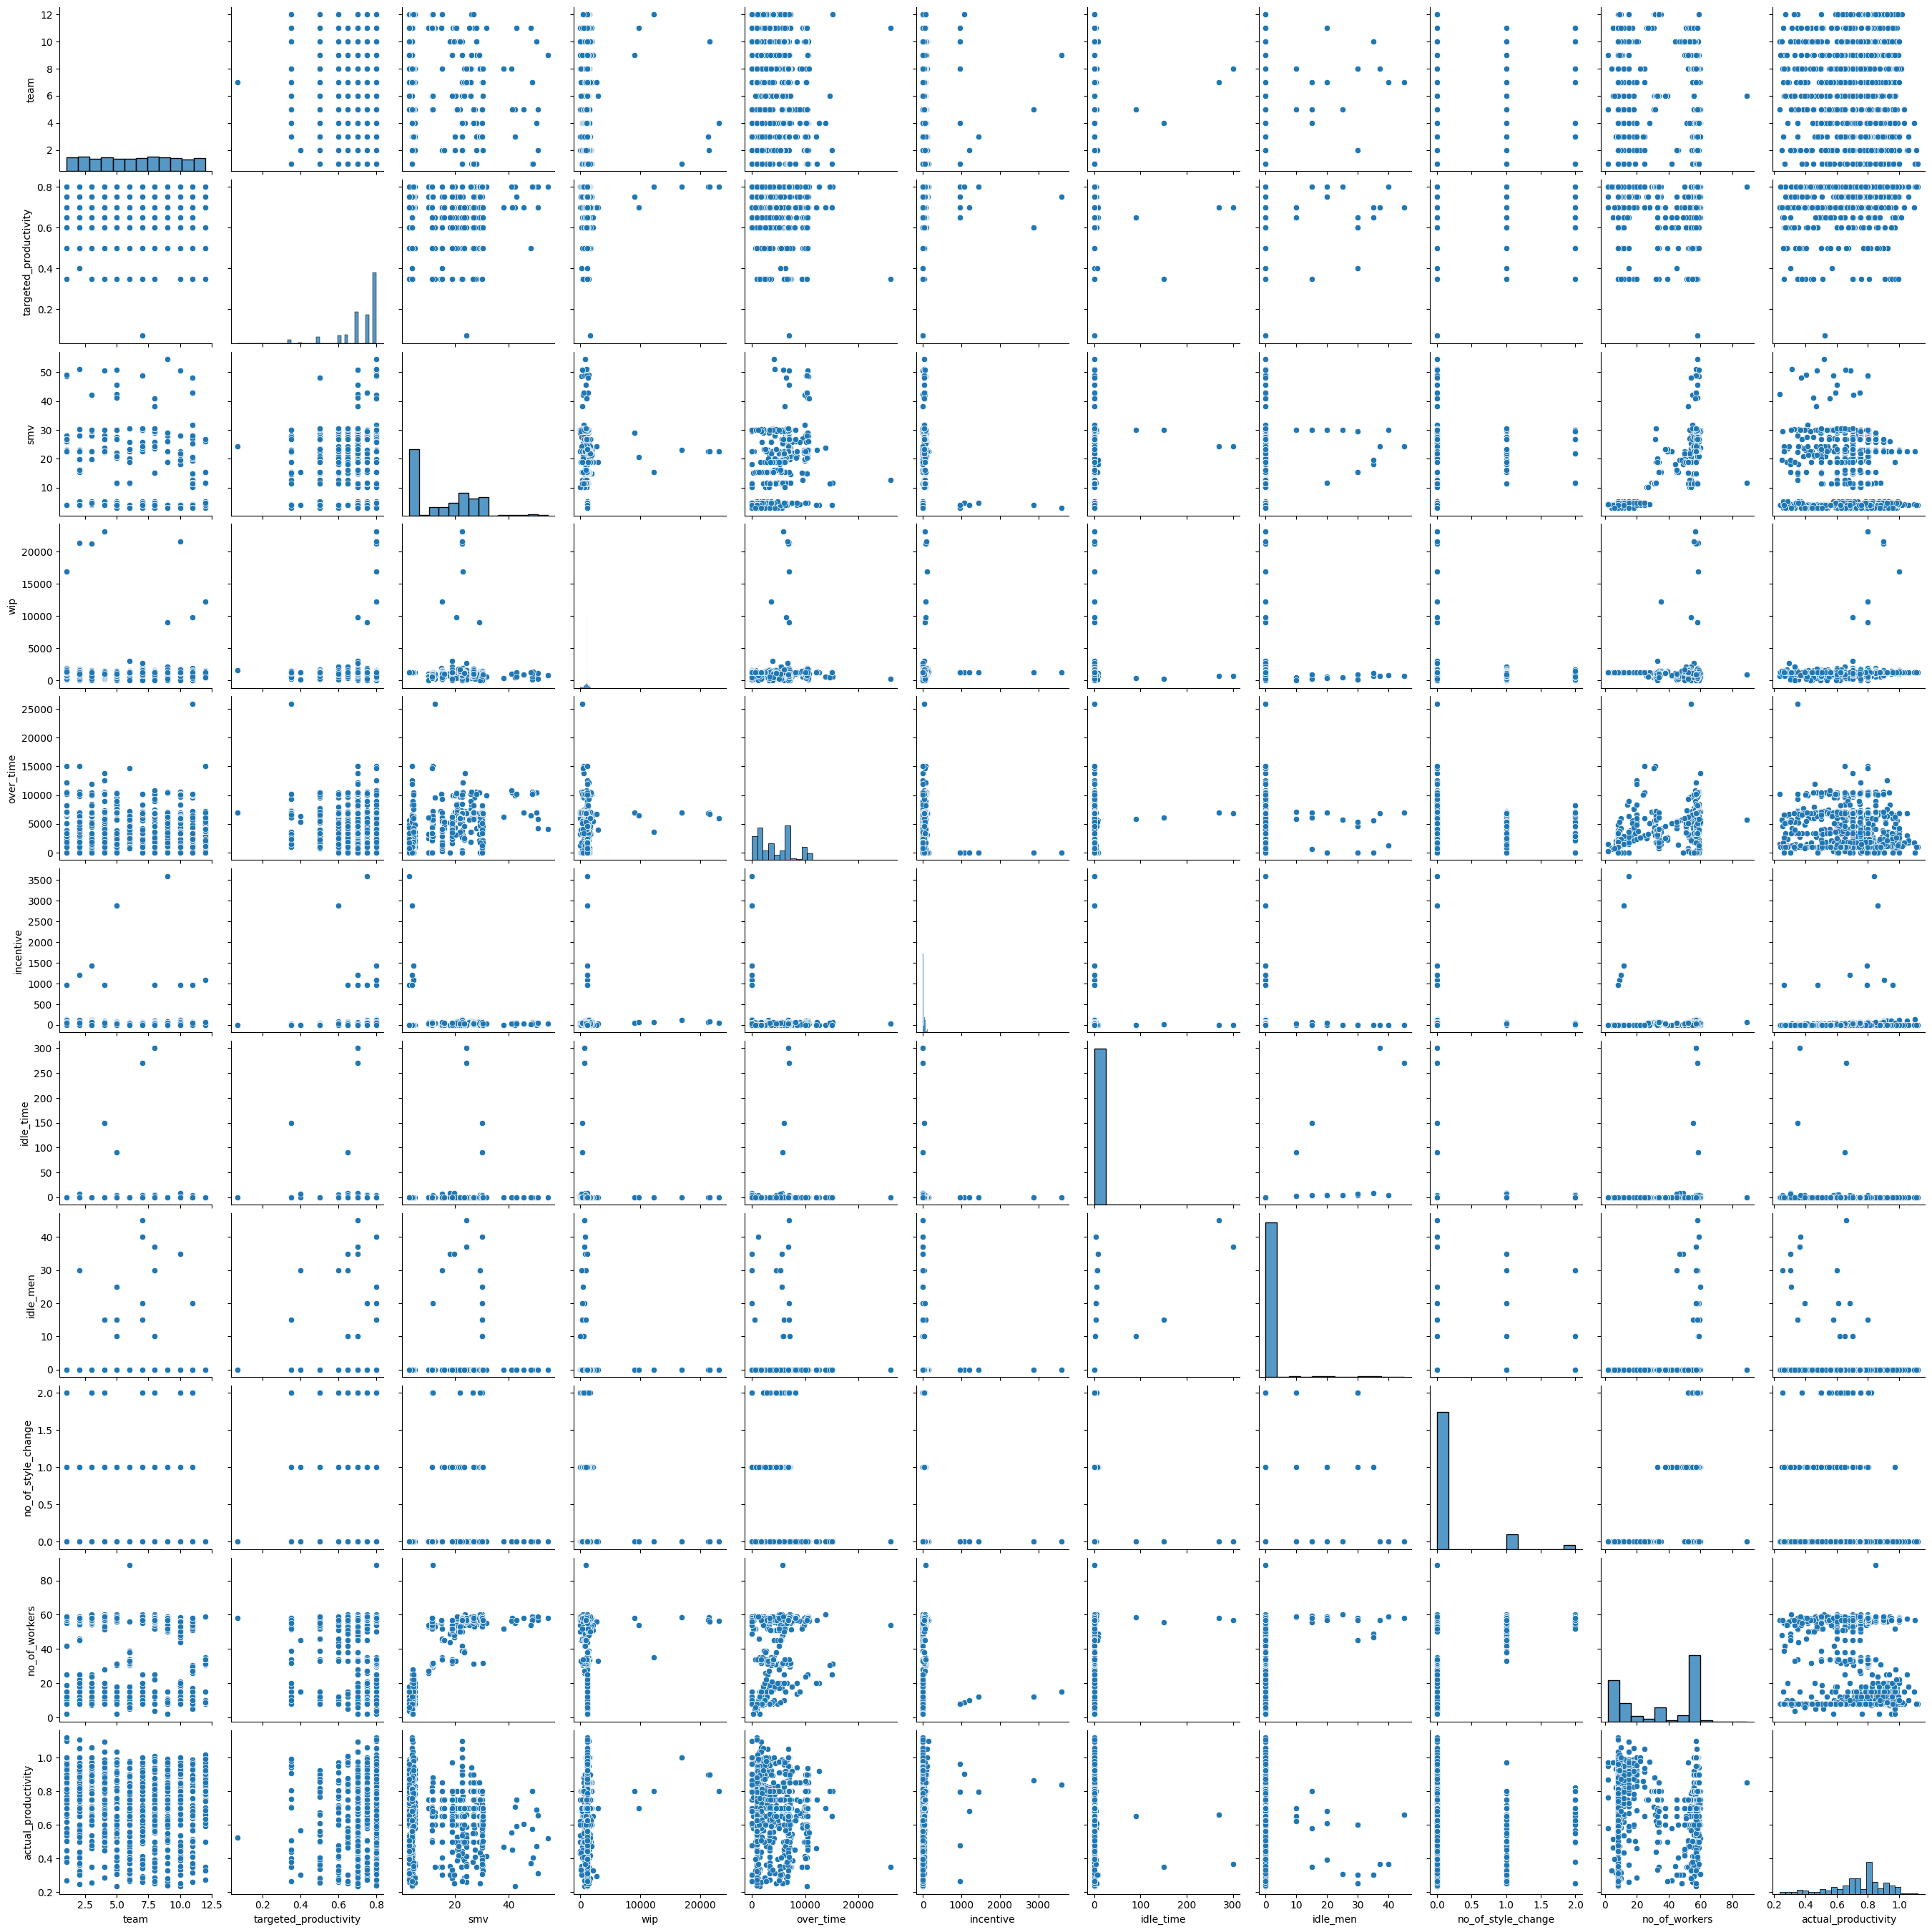

In [ ]:
# pair plot showing correlation between the variables

import matplotlib.pyplot as plt
sns.pairplot(pdt_clean)
plt.show()

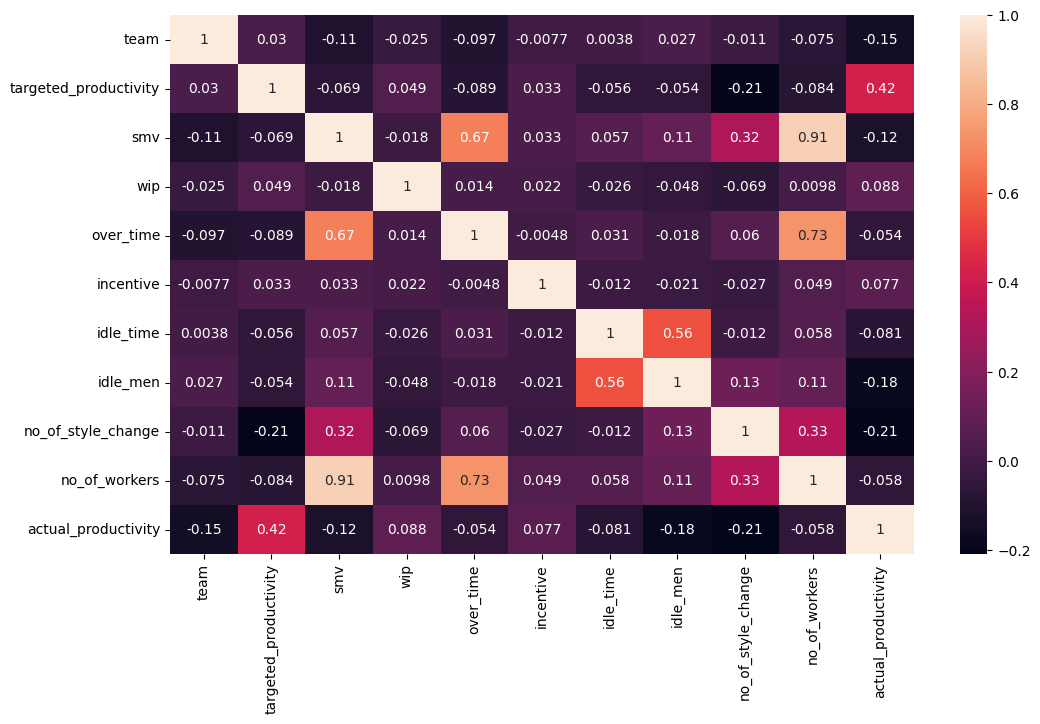

In [ ]:
# creating a heatmap by first removing the categorical data columns
new_pdt_clean = pdt_clean.drop(['date', 'quarter', 'department', 'day'], axis=1)

plt.figure(figsize=(12, 7))
sns.heatmap(new_pdt_clean.corr(), annot=True)
plt.show()

From the above representation it is evident that
- There is a significantly high positive correlation between no_of_workers and smv (standard minute value) of 0.91, no_of_workers and overtime of 0.73 and fairly positive correlation of 0.67 between the over_time and smv
- There is a weak correlation between no_of_style_change and smv which is  0.32, no_of_workers and no_of_style which is 0.33.
- There’s a strong negative correlation between team and smv of -0.11


Checking correlation between variables and the target variable that is actual productivity.

the heat map will not be created unless all the object column types are converted to float, therefore the days of the week shall be represented with numbers from 1 being sunday to 5 saturday and department replaced with 1 being sewing and finishing being 2. the quarter labels represented with numbers from 1 to 4 respectively.

In [14]:
#creating a copy of the dataframe to replace object values with intergers for analysis on a heatmap
pdt_clean_num = pdt_clean.copy()

#replacing days of the week
repl_dict = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday':2,
    'Thursday':3,
    'Saturday':4,
    'Sunday':5
}
pdt_clean_num['day'] = pdt_clean_num['day'].replace(repl_dict)

pdt_clean_num['department'] = pdt_clean_num['department'].replace({'sewing':0, 'finishing':1})

pdt_clean_num['quarter'] = pdt_clean_num['quarter'].replace({'Quarter1':1, 'Quarter2':2, 'Quarter3':3, 'Quarter4':4})

print(pdt_clean_num.department.unique())
print(pdt_clean_num.day.unique())
print(pdt_clean_num.quarter.unique())



[0 1]
[3 4 5 0 1 2]
[1 2 3 4]


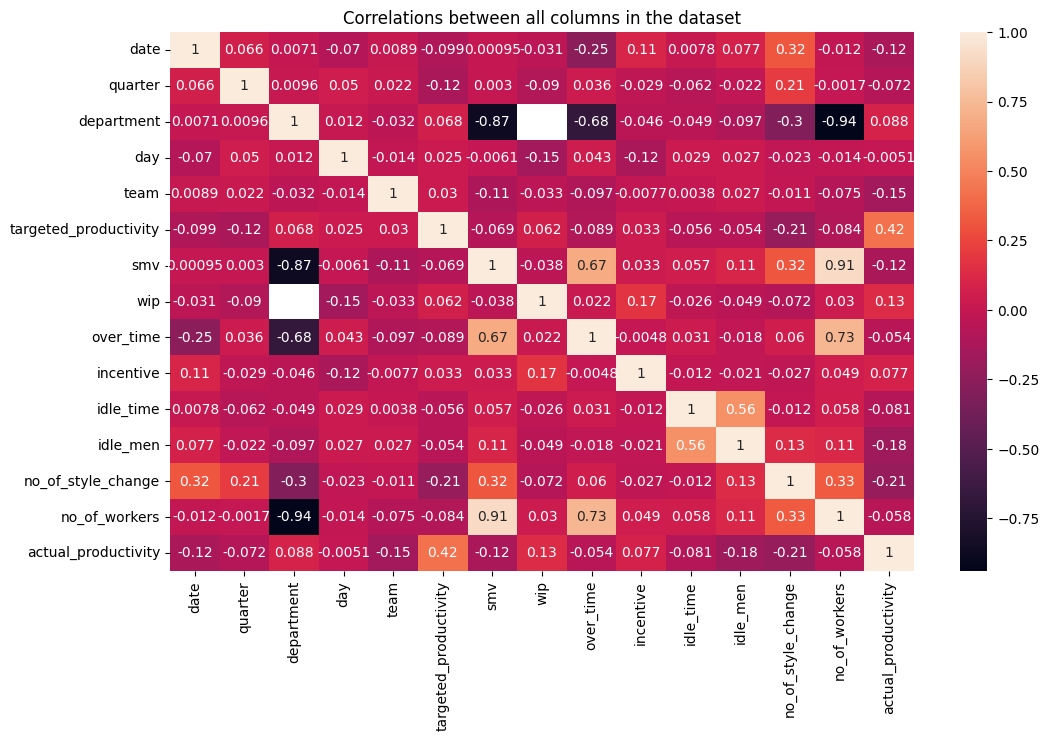

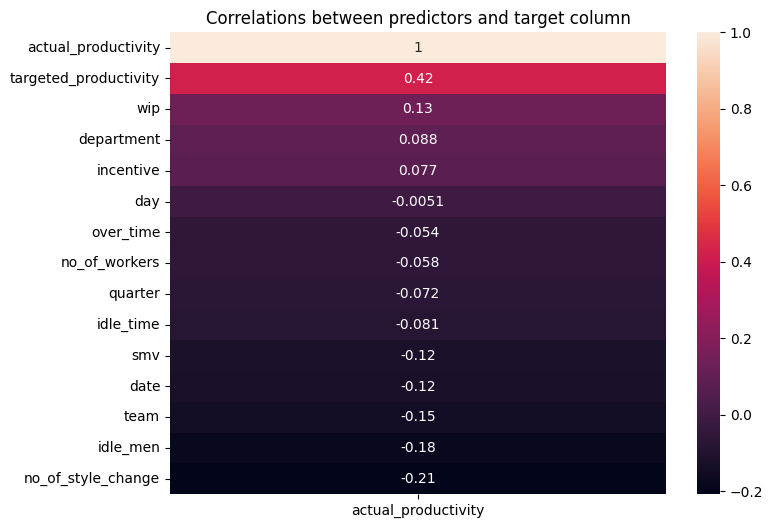

In [17]:
#checking the correlation between all the variables and the target variable i.e actual productivity
corr = pdt_clean_num.corr()
plt.figure(figsize=(12, 7))
sns.heatmap(pdt_clean_num.corr(), annot=True)
plt.title("Correlations between all columns in the dataset")
plt.show()

target_col=corr[['actual_productivity']].sort_values(by='actual_productivity', ascending=False)

plt.figure(figsize=(8,6))

sns.heatmap(target_col,annot=True)
plt.title("Correlations between predictors and target column")
plt.show()

From the above representation of figure 1 '**Correlations between all columns in the dataset**' it is evident that
- There is a significantly high positive correlation between no_of_workers and smv (standard minute value) of 0.91, no_of_workers and overtime of 0.73 and fairly positive correlation of 0.67 between the over_time and smv
- There is a weak correlation between no_of_style_change and smv which is  0.32, no_of_workers and no_of_style which is 0.33.
- There’s a strong negative correlation between team and smv of -0.11


From the above heat map i.e figure 2 '**Correlations between predictors and target column** it is shown that target productivity has a fairly positive correlation with the target (actual productivity)